Deterministic PCA is a limiting case of pPCA in the zero noise limit [Ghojogh et al., 2022]. In the finance literature on factor analysis, deterministic PCA is typically performed on levels or changes; here and in the following, we use levels.

First, I extract the (deterministic) PCA components and plot 1) loadings vs. maturities and 2) time series of score vectors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_utils import load_yield_data, load_fred_md
from plotting_utils import plot_yield_loadings
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from seed_utils import set_random_seed
set_random_seed(1)

yield_data = load_yield_data()
FIRST_DATE = yield_data.index.min() - pd.DateOffset(months=1)
LAST_DATE = yield_data.index.max()
fred_md = load_fred_md(start=FIRST_DATE, end=LAST_DATE)

selected_maturities = ['12m', '24m', '36m', '48m', '60m', '72m', '84m', '96m', '108m', '120m']


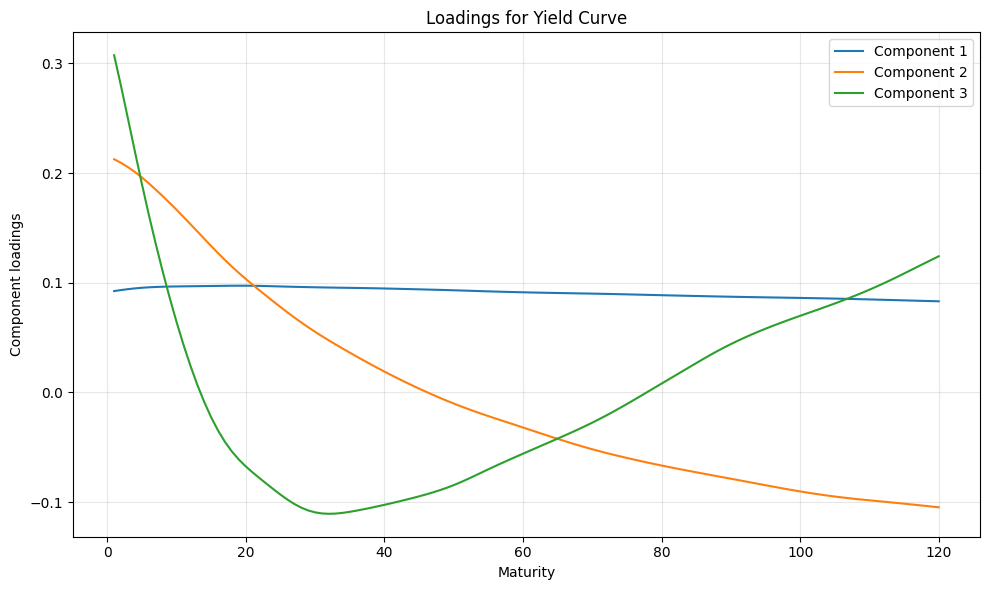

In [2]:
pca = PCA(n_components=3)
pca.fit(yield_data)
pca2D = PCA(n_components=2)
pca2D.fit(yield_data)
pca5D = PCA(n_components=5)
pca5D.fit(yield_data)
    
plot_yield_loadings(pca.components_)

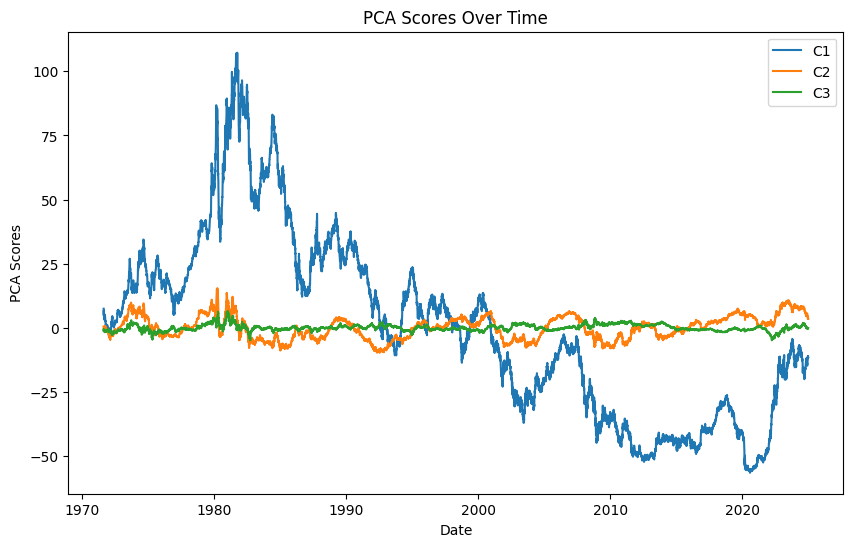

In [3]:
# Plot PCA scores per date 
pca_scores = pd.DataFrame(pca.transform(yield_data), index=yield_data.index, columns=['C1', 'C2', 'C3'])
pca2D_scores = pd.DataFrame(pca2D.transform(yield_data), index=yield_data.index, columns=['C1', 'C2'])
pca5D_scores = pd.DataFrame(pca5D.transform(yield_data), index=yield_data.index, columns=['C1', 'C2', 'C3', 'C4', 'C5'])
# Write PCA scores to csv
pca_scores.to_csv(r'scores/pca_scores.csv')
pca2D_scores.to_csv(r'scores/pca2d_scores.csv')
pca5D_scores.to_csv(r'scores/pca5d_scores.csv')

pca_scores_monthly = pca_scores.resample('MS').first()

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(yield_data.index, pca.transform(yield_data)[:, i], label=f'C{i+1}')
plt.xlabel('Date')
plt.ylabel('PCA Scores')
plt.title('PCA Scores Over Time')
plt.legend()
plt.show()

Next, I regress the time series of PCA loadings onto the macro factors from the FRED-MD dataset using:

$$
score^{(j)}_t = \beta_0 + \beta_1 macro\_factor^{(i)}_t+\epsilon_t,
$$

for the score from component $j \in \{1, 2, 3\}$ and macro factor $i \in \{1, 2, ...,126\}$. The macro factors are grouped into categories using the categories found in the updated FRED-MD Appendix, and each regressions marginal (in-sample) $R^2$ is plotted below.

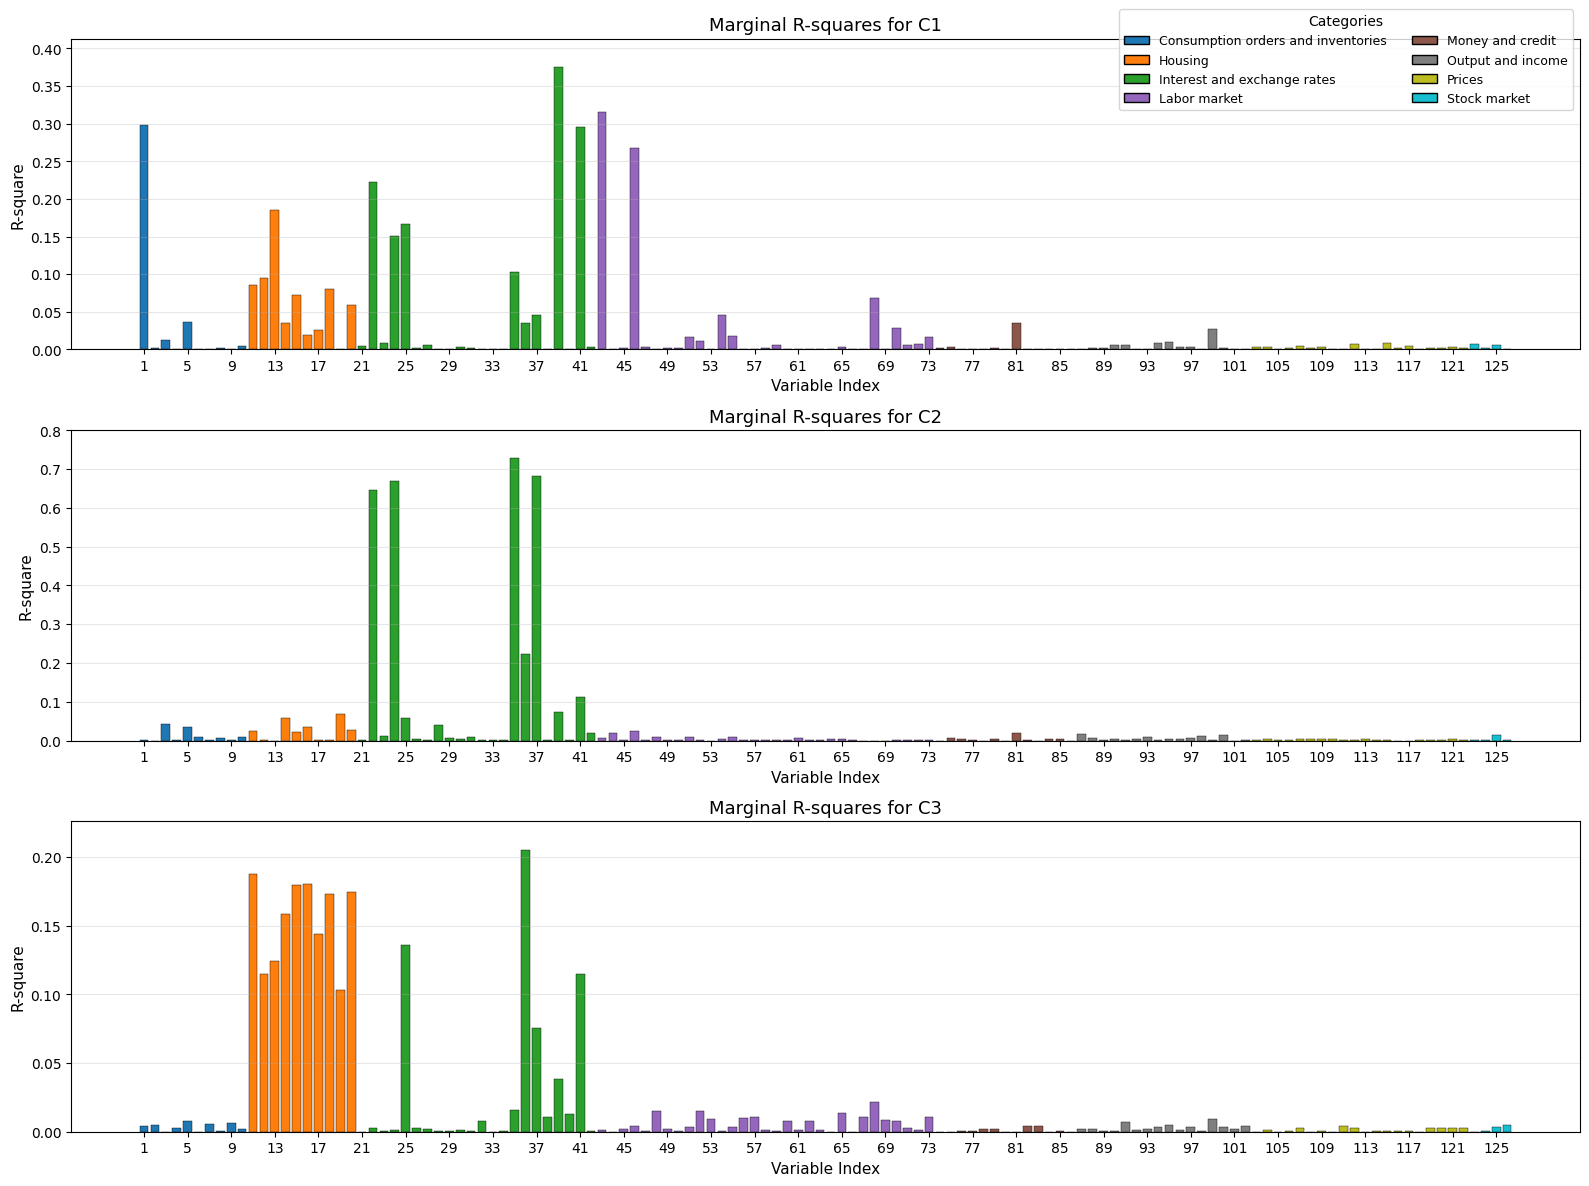

In [4]:
from plotting_utils import plot_marginal_r_squares
plot_marginal_r_squares(fred_md, pca_scores)

References:

* Ghojogh, Benyamin, Ali Ghodsi, Fakhri Karray, and Mark Crowley. 2022. “Factor Analysis, Probabilistic Principal Component Analysis, Variational Inference, and Variational Autoencoder: Tutorial and Survey.”
